# SETUP

In [1]:
from dataloader2 import Dataloader2
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing
from astropy.stats import median_absolute_deviation
from sklearn.ensemble import RandomForestRegressor
from prettytable import PrettyTable
from sklearn.metrics import mean_squared_error, mean_squared_log_error,r2_score,mean_absolute_error
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor,ExtraTreesRegressor

# Explonatory Data Analysis

In [2]:
dataloader2 = Dataloader2('BikeSharing-Dataset/hour.csv')
train, val, test = dataloader2.getData()
allData = dataloader2.getAllData()
allData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Seperating Categorical and Numerical Features

In [3]:
allData['dteday'] = pd.to_datetime(allData.dteday)
category_features = ['season', 'holiday', 'mnth', 'hr', 'weekday', 'workingday', 'weathersit']
number_features = ['temp', 'atemp', 'hum', 'windspeed']

features= category_features + number_features
target = ['cnt']

Samples to explore the data

In [4]:
allData.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Statistics of each column

In [5]:
allData.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [6]:
allData[number_features].describe()

,temp,atemp,hum,windspeed
count,17379.000000,17379.000000,17379.000000,17379.000000
mean,0.496987,0.475775,0.627229,0.190098
std,0.192556,0.171850,0.192930,0.122340
min,0.020000,0.000000,0.000000,0.000000
25%,0.340000,0.333300,0.480000,0.104500
50%,0.500000,0.484800,0.630000,0.194000
75%,0.660000,0.621200,0.780000,0.253700
max,1.000000,1.000000,1.000000,0.850700


In [7]:
for column in category_features:
    allData[column] = allData[column].astype('category')
allData[category_features].describe()

,season,holiday,mnth,hr,weekday,workingday,weathersit
count,17379,17379,17379,17379,17379,17379,17379
unique,4,2,12,24,7,2,4
top,3,0,7,17,6,1,1
freq,4496,16879,1488,730,2512,11865,11413


Analysying missing values

In [8]:
allData.isnull().any()

instant       False
dteday        False
season        False
yr            False
mnth          False
hr            False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool

Understanding via plots

/home/supradha/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'Year distribution of counts')]

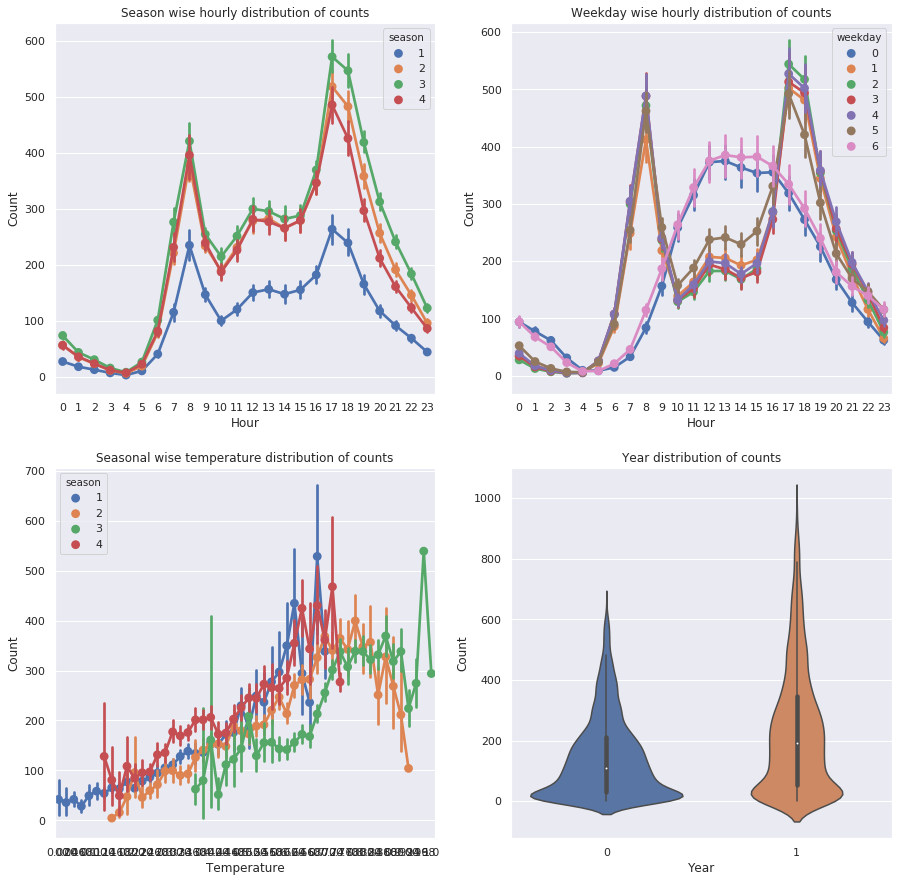

In [9]:
sns.set(font_scale=1.0)
fig, ax = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(15, 15)

sns.pointplot(data=allData[['hr', 'cnt', 'season']],x='hr',y='cnt',hue='season',ax=ax[0][0])
sns.pointplot(data=allData[['hr','cnt','weekday']],x='hr',y='cnt',hue='weekday',ax=ax[0][1])
sns.pointplot(data=allData[['temp','cnt','season']],x='temp',y='cnt',hue='season',ax=ax[1][0])
sns.violinplot(data=allData[['yr','cnt']],x='yr',y='cnt',ax=ax[1][1])


ax[0][0].set(xlabel='Hour', ylabel='Count',title="Season wise hourly distribution of counts")
ax[0][1].set(xlabel='Hour', ylabel='Count',title="Weekday wise hourly distribution of counts")
ax[1][0].set(xlabel='Temperature', ylabel='Count',title="Seasonal wise temperature distribution of counts")
ax[1][1].set(xlabel='Year', ylabel='Count',title="Year distribution of counts")

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Humidity'),
 Text(0.5, 1.0, 'Cnt v/s humidity')]

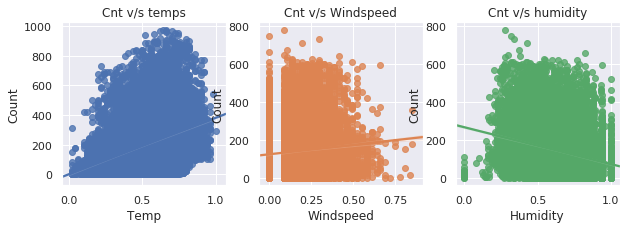

In [10]:
sns.set(font_scale=1.0)
fig, ax = plt.subplots(nrows=1,ncols=3, squeeze=False)
fig.set_size_inches(10, 3)


sns.regplot(data=allData[['temp','cnt']],x='temp',y='cnt',ax=ax[0][0])
sns.regplot(data=train[['windspeed','cnt']],x='windspeed',y='cnt',ax=ax[0][1])
sns.regplot(data=train[['hum','cnt']],x='hum',y='cnt',ax=ax[0][2])

ax[0][0].set(xlabel='Temp', ylabel='Count',title="Cnt v/s temps")
ax[0][1].set(xlabel='Windspeed', ylabel='Count',title="Cnt v/s Windspeed")
ax[0][2].set(xlabel='Humidity', ylabel='Count',title="Cnt v/s humidity")

Outlier Analysis

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Temperature'),
 Text(0.5, 1.0, 'Temperature wise distribution of counts')]

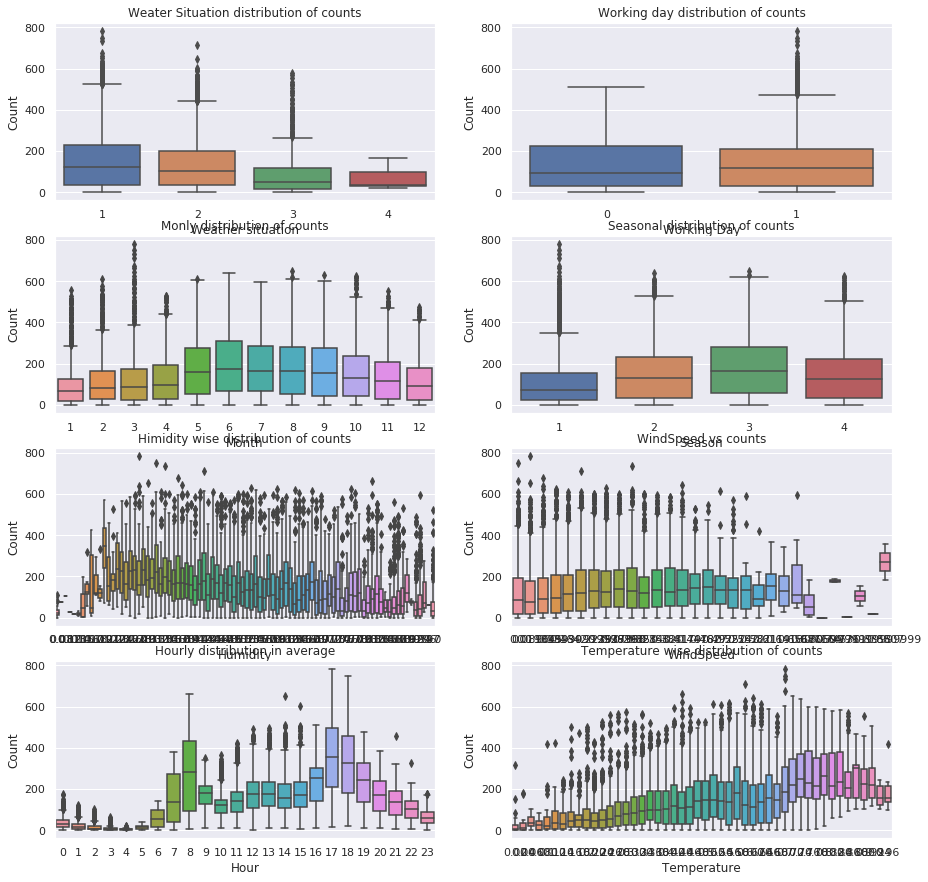

In [11]:
sns.set(font_scale=1.0)
fig, ax = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(15, 15)

sns.boxplot(data=train[['weathersit','cnt']],x='weathersit',y='cnt',ax=ax[0][0])
sns.boxplot(data=train[['workingday','cnt']],x='workingday',y='cnt',ax=ax[0][1])
sns.boxplot(data=train[['mnth','cnt']],x='mnth',y='cnt',ax=ax[1][0])
sns.boxplot(data=train[['season', 'cnt']],x='season',y='cnt',ax=ax[1][1])
sns.boxplot(data=train[['hum', 'cnt']],x='hum',y='cnt',ax=ax[2][0])
sns.boxplot(data=train[['windspeed', 'cnt']],x='windspeed',y='cnt',ax=ax[2][1])
sns.boxplot(data=train[['hr','cnt']],x='hr',y='cnt',ax=ax[3][0])
sns.boxplot(data=train[['temp','cnt']],x='temp',y='cnt',ax=ax[3][1])



ax[0][0].set(xlabel='Weather situation', ylabel='Count',title="Weater Situation distribution of counts")
ax[0][1].set(xlabel='Working Day', ylabel='Count',title="Working day distribution of counts")
ax[1][0].set(xlabel='Month', ylabel='Count',title="Monly distribution of counts")
ax[1][1].set(xlabel='Season', ylabel='Count',title="Seasonal distribution of counts")
ax[2][0].set(xlabel='Humidity', ylabel='Count',title="Himidity wise distribution of counts")
ax[2][1].set(xlabel='WindSpeed', ylabel='Count',title="WindSpeed vs counts")
ax[3][0].set(xlabel='Hour', ylabel='Count',title="Hourly distribution in average")
ax[3][1].set(xlabel='Temperature', ylabel='Count',title="Temperature wise distribution of counts")

Perception: 

1) The working day plots shows that more bicycles are rent during normal working days than on weekends or holidays. On holidays the bikes are rented mostly during mid day.

2) The hourly box plots show maximum of bike rental at 8 am and one at 5 pm which indicates that most users of the renters use the bikes to get to work or school. 

3) Temperature plots show: higher temperatures lead to an increasing number of bike rents and lower temperatures not only decrease the average number of rents but also shows more outliers in the data.

4) Weather situation plot shows renting more bikes in clear weather

5) Seasonal plots shows tha fall has higher bike rentals 

6) Higher the windspeed less rentals. Normal humidity is preferred for bike rentals

Mean Absolute deviations

Remove outliers

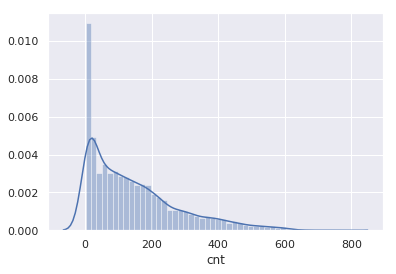

In [12]:
sns.distplot(train[target[-1]]);

Samples in train set with outliers: 10427
Samples in train set without outliers: 10151


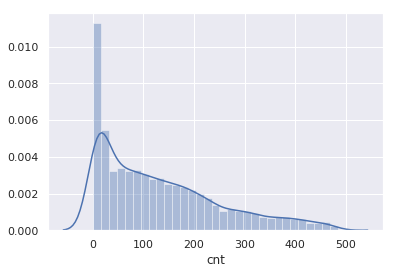

In [13]:
print("Samples in train set with outliers: {}".format(len(train)))
q1 = train.cnt.quantile(0.25)
q3 = train.cnt.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 
train_preprocessed = train.loc[(train.cnt >= lower_bound) & (train.cnt <= upper_bound)]
print("Samples in train set without outliers: {}".format(len(train_preprocessed)))
sns.distplot(train_preprocessed.cnt);

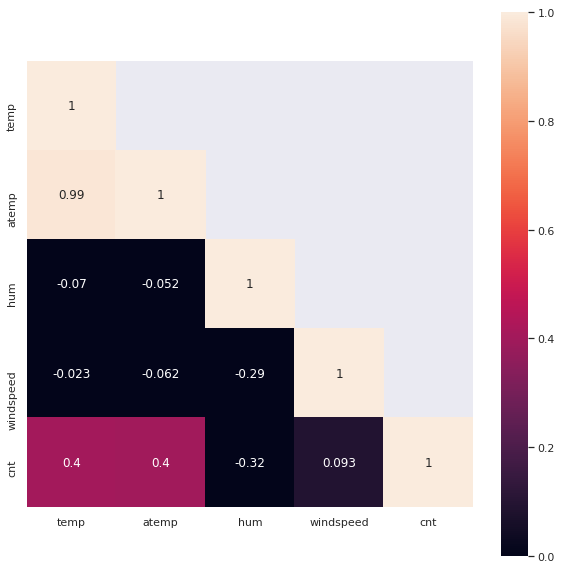

In [15]:
matrix = allData[number_features + target].corr()
heat = np.array(matrix)
heat[np.tril_indices_from(heat)] = False
fig,ax= plt.subplots()
fig.set_size_inches(10,10)
sns.set(font_scale=1.0)
sns.heatmap(matrix, mask=heat,vmax=1.0, vmin=0.0, square=True,annot=True)

End Note:

1) The variables temp and atemp are strongly co-ordinated.Hence to reduce dimensinality "atemp" is not taken. month and season has high-correlation effect as well.

2) temp and humidity features have positive and negative correlations with count respectively. Although the correlations between them are not very prominent, still the count variable has got a little dependency on temp and humidity.

2) The attributes "hr" and "temp" features for the bike sharing count prediction. But we still need to check feature importance.

3) Casual and registered information about the bike sharing count is directly proportional(leakage variables).

4) dteday is already split into month day and year, Hence the attribute is not taken into features. 

# Model Selection

The characteristics of given problem

1) Target variable: 'cnt' which a continous variable thus Regression method

2) small to medium dataset - 100 K samples

3) From correlation matrix and scatter plots we identified the importance of few features.

Hence we are using some of the Regression algorithms to identify the best results Most common algorithms are

1) Linear Regression

2) SVR

3) Random Forest

4) Gradient Boosting

In [16]:
#features.remove('dteday')
features.remove('atemp')
features

['season',
 'holiday',
 'mnth',
 'hr',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'hum',
 'windspeed']

In [17]:
x_train = train_preprocessed[features].values
y_train = train_preprocessed[target].values.ravel()

x_val=val[features].values
y_val=val[target].values.ravel()

x_test =test[features].values
y_test =test[target].values.ravel()

In [18]:
from sklearn import model_selection
from sklearn.model_selection import KFold
table = PrettyTable()
table.field_names = ["Model", "MAE", 'RMSE', "AdjR² score"]

models = [
    RandomForestRegressor(random_state=0, n_estimators=100),
    LinearRegression(),
    ExtraTreesRegressor(random_state=0, n_estimators=100),
    GradientBoostingRegressor(n_estimators=400,alpha=0.01),
    SVR(gamma='auto', kernel='rbf')
]

for model in models:
    
    model.fit(x_train, y_train) 
    pred = model.predict(x_val)
    mae = mean_absolute_error(y_val, pred)
    rmse = sqrt(mean_squared_error(y_val, pred))
    score = r2_score(y_val, pred)   
    table.add_row([type(model).__name__, format(mae, '.2f'), format(rmse, '.2f') , format(score, '.2f')])
    
print(table)

+---------------------------+--------+--------+-------------+
|           Model           |  MAE   |  RMSE  | AdjR² score |
+---------------------------+--------+--------+-------------+
|   RandomForestRegressor   | 96.38  | 137.68 |     0.59    |
|      LinearRegression     | 146.85 | 207.24 |     0.08    |
|    ExtraTreesRegressor    | 97.47  | 138.84 |     0.58    |
| GradientBoostingRegressor | 99.38  | 142.08 |     0.57    |
|            SVR            | 137.56 | 204.11 |     0.10    |
+---------------------------+--------+--------+-------------+


#Random Forest Regression model

In [20]:
from sklearn.ensemble import RandomForestRegressor
from prettytable import PrettyTable
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from math import sqrt

table = PrettyTable()
table.field_names = ["Model", "Dataset", "MSE", 'RMSE', 'RMSLE', "R² score"]
rf_model = RandomForestRegressor(n_estimators = 300,max_features = 'auto')
rf_model.fit(x_train, y_train) 
                                 
def evaluate(x, y, dataset):
    pred = rf_model.predict(x)

    mse = mean_absolute_error(y, pred)
    rmse = sqrt(mean_squared_error(y, pred))
    score = rf_model.score(x, y)    
    rmsle = sqrt(mean_squared_log_error(y, pred))
    #rmslescore= rmsle(y_test,pred)

    table.add_row([type(rf_model).__name__, dataset, format(mse, '.3f'), format(rmse, '.3f'), format(rmsle, '.3f'), format(score, '.2f')])
    

evaluate(x_train, y_train, 'training')
evaluate(x_val, y_val, 'validation')
#evaluate(x_test, y_test, 'test')

print(table)

+-----------------------+------------+--------+---------+-------+----------+
|         Model         |  Dataset   |  MSE   |   RMSE  | RMSLE | R² score |
+-----------------------+------------+--------+---------+-------+----------+
| RandomForestRegressor |  training  | 9.027  |  14.172 | 0.183 |   0.99   |
| RandomForestRegressor | validation | 96.524 | 137.866 | 0.476 |   0.59   |
+-----------------------+------------+--------+---------+-------+----------+


Feature Importance

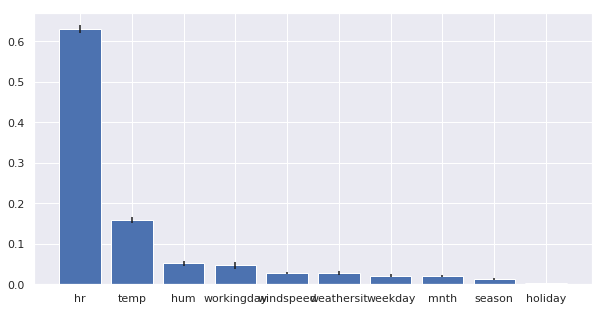

In [21]:
rfimportance = rf_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model.estimators_], axis=0)
indices = np.argsort(rfimportance)[::-1]
plt.figure(figsize=(10,5))
plt.bar(range(x_val.shape[1]), rfimportance[indices], yerr=std[indices], align="center")
plt.xticks(range(x_val.shape[1]), [features[i] for i in indices])
plt.show()

In [22]:
def rmsle(y, y_):
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [26]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

table = PrettyTable()
table.field_names = ["Model", "Dataset", "MSE", 'RMSE', 'RMSLE', "R² score"]
gbm = GradientBoostingRegressor()
param_grid = { 
    'n_estimators': [200],
    'max_features': ["auto"],
    'min_samples_leaf':[40],
    'min_samples_split':[300],
    'max_depth' : [10],
    'subsample': [0.4,0.6],
    'learning_rate':[0.1,0.01]
}
CV_gbm=GridSearchCV(estimator=gbm,param_grid=param_grid,cv=5)
CV_gbm.fit(X = x_train,y = np.log1p(y_train))
#print (CV_gbm.best_params_)
#preds = CV_gbm.predict(X= x_val)
#print ("RMSLE Value: ",rmsle(y_val,np.exp(preds)))
def evaluate(x, y, dataset):
    pred = CV_gbm.predict(x)

    mse = mean_absolute_error(y, pred)
    rmse = sqrt(mean_squared_error(y, pred))
    score = rf_model.score(x, y)    
    #rmsle = sqrt(mean_squared_log_error(y, pred))
    rmslescore= rmsle(y_val,np.exp(pred))

    table.add_row([type(CV_gbm).__name__, dataset, format(mse, '.3f'), format(rmse, '.3f'), format(rmslescore, '.3f'), format(score, '.2f')])
    

evaluate(x_train, y_train, 'training')
evaluate(x_val, y_val, 'validation')
#evaluate(x_test, y_test, 'test')

print(table)

+--------------+------------+---------+---------+-------+----------+
|    Model     |  Dataset   |   MSE   |   RMSE  | RMSLE | R² score |
+--------------+------------+---------+---------+-------+----------+
| GridSearchCV |  training  | 129.613 | 174.933 | 0.490 |   0.99   |
| GridSearchCV | validation | 259.571 | 336.684 | 0.490 |   0.59   |
+--------------+------------+---------+---------+-------+----------+


In [27]:
%run -i 'randomForestFinal.py'

+-----------------------+--------------------+-------------------------+---------------------+-------+----------+
|         Model         | Mean Squared Error | Root Mean Squared Error | Mean Absolute Error | RMSLE | R² score |
+-----------------------+--------------------+-------------------------+---------------------+-------+----------+
| RandomForestRegressor |      4089.733      |          63.951         |        42.169       | 0.403 |  0.870   |
| RandomForestRegressor |      4134.764      |          64.302         |        42.228       | 0.406 |  0.877   |
| RandomForestRegressor |      4479.164      |          66.927         |        42.398       | 0.399 |  0.864   |
| RandomForestRegressor |      5117.414      |          71.536         |        45.453       | 0.404 |  0.846   |
| RandomForestRegressor |      4412.091      |          66.424         |        43.347       | 0.387 |  0.868   |
| RandomForestRegressor |      4548.692      |          67.444         |        44.135  